In [ ]:
## to do:
# if json files exist in the folder, make a mask from all annotations
# convert mask to distance-transform
# save masks in a separate folder of masks named after the image stacks

In [1]:
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install labelme

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.4 MB/s 
     |████████████████████████████████| 7.7 MB 46.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 82 kB 409 kB/s 
     |████████████████████████████████| 8.4 MB 27.8 MB/s 
     |████████████████████████████████| 344 kB 68.7 MB/s 
     |████████████████████████████████| 59.9 MB 1.2 MB/s 
  Created wheel for labelme: filename=labelme-5.0.1-py3-none-any.whl size=1466204 sha256=217350bc70fe4f568b04fd6ddd41f46a99712742c309e9c12ab95928afdced6a
  Stored in directory: /root/.cache/pip/wheels/e4/f1/e1/84b4d6e95299dbc58c1616c63622624e39643ee591866cfd1e
  Created wheel for imgviz: filename=imgviz-1.5.1-py3-none-any.whl size=7680505 sha256=018a16e006444a33b00abdacd3684443f6329f8387427e254ad4efbc916b5db9
  Stored in direc

In [3]:
import os
import json
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy import ndimage, signal
import glob
from labelme import utils

In [4]:
img_dir = '/content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot' 
mask_dir = '/content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_masks'
if not os.path.exists(mask_dir): 
    os.makedirs(mask_dir)

In [6]:
do_not_include =['ind', 'spr', 'fun', 'fun?', 'fungal spore' 'what is this?']

In [7]:
### create masks for all image stacks in img_dir ########################################################
idx = 0
for root, dirs, files in os.walk(img_dir):
    for dir in dirs:
        dir_path = os.path.join(root,dir)
        files = os.listdir(dir_path)
        full_annot = []
        label_name_to_value = {"_background_": 0}
        if not glob.glob(os.path.join(dir_path,'*.json')):
            tmpImg = Image.open(os.path.join(dir_path,os.listdir(dir_path)[0]))
            x,y = tmpImg.size
            lbl = np.zeros((y,x), dtype = np.int8)

            mask_save_dir = os.path.join(mask_dir, dir)
            if not os.path.exists(mask_save_dir): 
                os.makedirs(mask_save_dir)
            im = Image.fromarray(lbl)
            im.save(os.path.join(mask_save_dir,'GT_mask.png'))

            idx += 1
            print(idx, dir_path)
            print('No json files found')
            continue 

        for file in files:
            if file.endswith(".json"):
              with open(os.path.join(dir_path, file), "r",encoding="utf-8") as f:
                  tmpData = json.load(f)
                  for shape in sorted(tmpData["shapes"], key=lambda x: x["label"]):    
                      label_name = shape["label"]
                      if label_name in do_not_include:
                          continue
                      label_name_to_value.update({label_name:1})
                      full_annot.append(shape)
        lbl, _ = utils.shapes_to_label((tmpData['imageHeight'],tmpData['imageWidth']), full_annot, 
                                      label_name_to_value)
        
        mask_distanceTransform = ndimage.distance_transform_edt(lbl)
        mask_distanceTransform = mask_distanceTransform.astype(np.uint8)

        idx += 1
        print(idx, dir_path)

############# TESTING: uncomment below section to visualize one distance transform or binary label #####
        # plt.figure(figsize=(8, 10))
        # plt.imshow(lbl)
        # plt.imshow(mask_distanceTransform)

        # if idx ==1:
        #   break

############## save ####################################################################################
        mask_save_dir = os.path.join(mask_dir, dir)
        if not os.path.exists(mask_save_dir): 
            os.makedirs(mask_save_dir)
        im = Image.fromarray(mask_distanceTransform)
        im.save(os.path.join(mask_save_dir,'GT_mask.png'))

1 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_47280y
No json files found
2 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_43120y
3 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_46240y
No json files found
4 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_41040y
5 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_42080y
6 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_49360y
7 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_48320y
No json files found
8 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_45200y
9 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_44160y
No json files found
10 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnnot/40000x_40000y
11 /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_tiles_withAnn

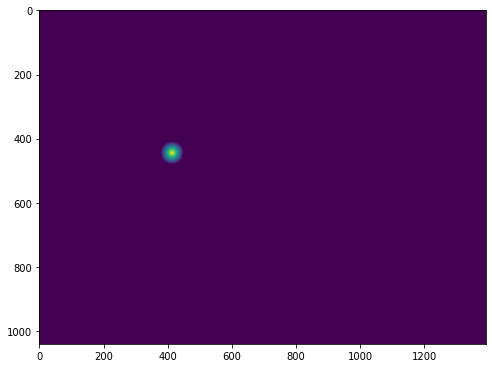

In [ ]:
mask_distanceTransform = ndimage.distance_transform_edt(lbl)

plt.figure(figsize=(8, 10))
plt.imshow(mask_distanceTransform)

# scratch

In [ ]:
## export image, mask, overlay visualization, and text file of label names. only works for one json file.
# !labelme_json_to_dataset /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_crops_withAnnot/41392x_40000y/4z.json -o /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_crops_withAnnot/41392x_40000y/4z_json

[WARNING] json_to_dataset:main:16 - This script is aimed to demonstrate how to convert the JSON file to a single image dataset.
[WARNING] json_to_dataset:main:20 - It won't handle multiple JSON files to generate a real-use dataset.
[INFO   ] json_to_dataset:main:77 - Saved to: /content/gdrive/MyDrive/UTRECHT/Detection/PAL1999/C6_crops_withAnnot/41392x_40000y/4z_json


In [ ]:
print(data["shapes"])
print(label_name_to_value)
print(label_name)
print(full_annot)

[{'label': 'pla', 'points': [[508.7215189873417, 166.73417721518987], [568.2151898734177, 223.69620253164555]], 'group_id': None, 'shape_type': 'circle', 'flags': {}}, {'label': 'ind', 'points': [[1174.5443037974683, 602.1772151898734], [1201.126582278481, 635.0886075949367]], 'group_id': None, 'shape_type': 'circle', 'flags': {}}]
{'_background_': 0, 'unsure': 1, 'ind': 1, 'pla': 1}
pla
[[{'label': 'unsure', 'points': [[203.65822784810126, 357.873417721519], [237.83544303797467, 395.8481012658228]], 'group_id': None, 'shape_type': 'circle', 'flags': {}}, {'label': 'unsure', 'points': [[1137.8354430379745, 71.79746835443038], [1164.4177215189873, 112.30379746835442]], 'group_id': None, 'shape_type': 'circle', 'flags': {}}], [{'label': 'pla', 'points': [[508.7215189873417, 166.73417721518987], [568.2151898734177, 223.69620253164555]], 'group_id': None, 'shape_type': 'circle', 'flags': {}}, {'label': 'ind', 'points': [[1174.5443037974683, 602.1772151898734], [1201.126582278481, 635.08860

{'label': 'pla',
 'points': [[508.7215189873417, 166.73417721518987],
  [568.2151898734177, 223.69620253164555]],
 'group_id': None,
 'shape_type': 'circle',
 'flags': {}}